In [34]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving housing.csv to housing (2).csv
Arquivo "housing.csv" importado pelo usuário com tamanho de 49082 bytes


In [35]:
# coding: utf-8
# ***Regression: machine learning problem from end-to-end using Python****
# # Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# # Load dataset
filename = ("D:\Dropbox\Estudos\FIAP\Aulas\MBA IA\Modelos de Inteligência Artificial\Fontes\Datasets\housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv('housing.csv', delim_whitespace=True, names=names,engine='python')

#
#- CRIM     per capita crime rate by town
#- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS    proportion of non-retail business acres per town
#- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#- NOX      nitric oxides concentration (parts per 10 million)
#- RM       average number of rooms per dwelling -  é o número médio de cômodos entre os imóveis na vizinhança.
#- AGE      proportion of owner-occupied units built prior to 1940
#- DIS      weighted distances to five Boston employment centres
#- RAD      index of accessibility to radial highways
#- TAX      full-value property-tax rate per $10,000
#- PTRATIO  pupil-teacher ratio by town - é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.
#- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#- LSTAT    % lower status of the population - é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
#- MEDV     Median value of owner-occupied homes in $1000's


# Descriptive statistics
# shape
print(dataset.shape)

(506, 14)


In [36]:
# types
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [37]:
# head
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2
5,2.99e-02,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222.0,18.7,394.12,5.21,28.7
6,8.83e-02,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311.0,15.2,395.60,12.43,22.9
7,1.45e-01,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311.0,15.2,396.90,19.15,27.1
8,2.11e-01,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311.0,15.2,386.63,29.93,16.5
9,1.70e-01,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311.0,15.2,386.71,17.10,18.9


In [38]:
# descriptions, change precision to 2 places
set_option('precision', 1)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [39]:
# correlation
# From Correlation data,
# We can confim that variable  LSTAT, RM, AGE and PTRATIO have good corelation with our output variable MEDV.
# These variables we need to consider when we optimze our predictive value

set_option('precision', 2)
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


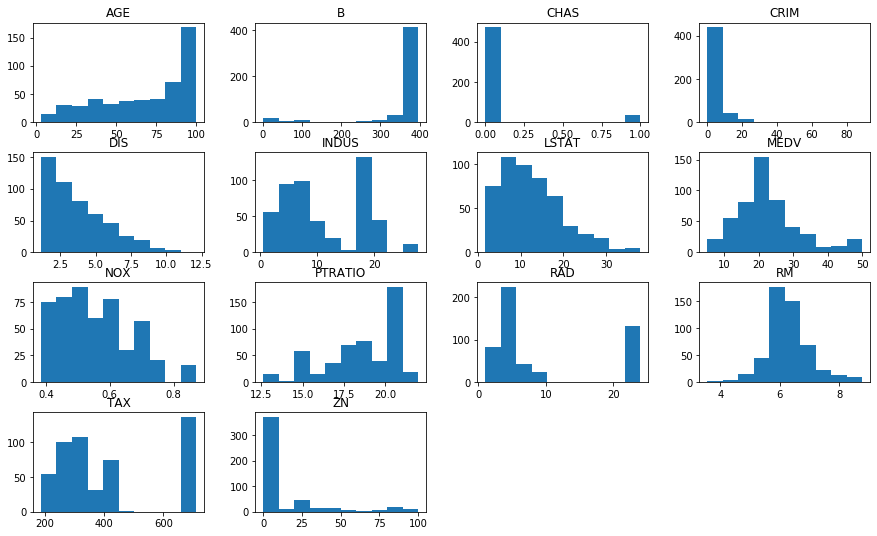

In [40]:
# Data visualizations
# histograms
dataset.hist(bins=10,figsize=(15,9),grid=False);

In [41]:
# I do feel features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
# Analysis from above  data:
# 1)increase in RM value increases MEDV value ie price of the home.
# 2) Lower the value of LSTAT higher the value of MEDV
# 3) PTRATIO decrease in the value increases MEDV

prices = dataset['MEDV']
dataset = dataset.drop(['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD'], axis = 1)
features = dataset.drop('MEDV', axis = 1)
dataset.head()
#features.head()

,CHAS,RM,TAX,PTRATIO,B,LSTAT,MEDV
0,0,6.58,296.0,15.3,396.90,4.98,24.0
1,0,6.42,242.0,17.8,396.90,9.14,21.6
2,0,7.18,242.0,17.8,392.83,4.03,34.7
3,0,7.00,222.0,18.7,394.63,2.94,33.4
4,0,7.15,222.0,18.7,396.90,5.33,36.2


In [42]:
# Split-out validation dataset
seed = 7
validation_size = 0.30

array = dataset.values
X = array[:,0:6]
Y = array[:,6]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Evaluate Algorithm
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

# # Standardize the dataset
# 

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('DTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ADA', Pipeline([('Scaler', StandardScaler()),('ADA', AdaBoostRegressor())])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('SVR-RBF', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))])))
pipelines.append(('SVR-Linear', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='linear', C=100, gamma='auto'))])))
pipelines.append(('SVR-Poly', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1))])))

results = []
names = []

for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -25.397213 (8.981140)
KNN: -18.478570 (8.468452)
DTR: -29.286110 (14.361175)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RF: -17.312075 (8.675543)
ADA: -18.036940 (7.729042)
SVR: -29.963157 (15.610526)
SVR-RBF: -13.682888 (8.339873)
SVR-Linear: -26.252942 (10.147972)
SVR-Poly: -52.550481 (33.423878)


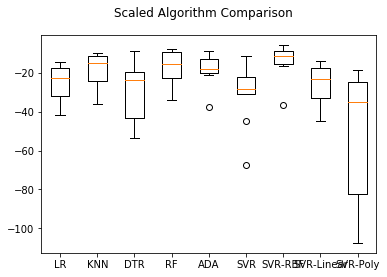

In [43]:
# # Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [44]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

svr_rbf.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)

predictions = svr_rbf.predict(rescaledValidationX)
print(metrics.median_absolute_error(Y_validation, predictions))

1.8375933678900855


In [45]:
print(metrics.mean_squared_error(Y_validation, predictions))

13.22940521895349


In [46]:
predictions=predictions.astype(int)
finalresult = pd.DataFrame({
        "Preço Original": Y_validation,
        "Preço Predito": predictions
    })

finalresult.head()
#finalresult.to_csv("PredictedPrice.csv", index=False)

,Preço Original,Preço Predito
0,21.7,27
1,18.5,19
2,22.2,20
3,20.4,20
4,8.8,11
